# Problem 1

In [1]:
import numpy as np
import scipy.io as io
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

hw3_1 = io.loadmat("hw3.mat")['hw3_1']
hw3_2_1 = io.loadmat("hw3.mat")['hw3_2_1']
hw3_2_2 = io.loadmat("hw3.mat")['hw3_2_2']

hw4_2_1 = io.loadmat("hw4.mat")['hw4_2_1']
hw4_2_2 = io.loadmat("hw4.mat")['hw4_2_2']

print(hw3_1.shape)
print(hw4_2_1.shape)

(2, 100)
(2, 100)


In [2]:
def knn_density_estimation(target_x, data, k=10):

    N = data.shape[1]
    dim = data.shape[0]
    diff = data - target_x
    dists = np.linalg.norm(diff, axis=0)

    sorted_dists = np.sort(dists)
    dist_k = sorted_dists[k-1] 
    V = np.pi * (dist_k ** 2)
    
    if V == 0:
        return 0 
    p = (k / N) / V
    return p


In [3]:
# Define Grid
xs = np.arange(-4, 8.1, 0.1)
ys = np.arange(-4, 8.1, 0.1)
Xg, Yg = np.meshgrid(xs, ys)

P1 = np.zeros(Xg.shape)
P2 = np.zeros(Yg.shape)
k = 10

In [4]:
# Compute for Class 1
for i in range(len(xs)):
    for j in range(len(ys)):
        pt = np.array([[xs[i]], [ys[j]]])
        P1[j, i] = knn_density_estimation(pt, hw3_2_1, k) 

# Compute for Class 2
for i in range(len(xs)):
    for j in range(len(ys)):
        pt = np.array([[xs[i]], [ys[j]]])
        P2[j, i] = knn_density_estimation(pt, hw3_2_2, k)

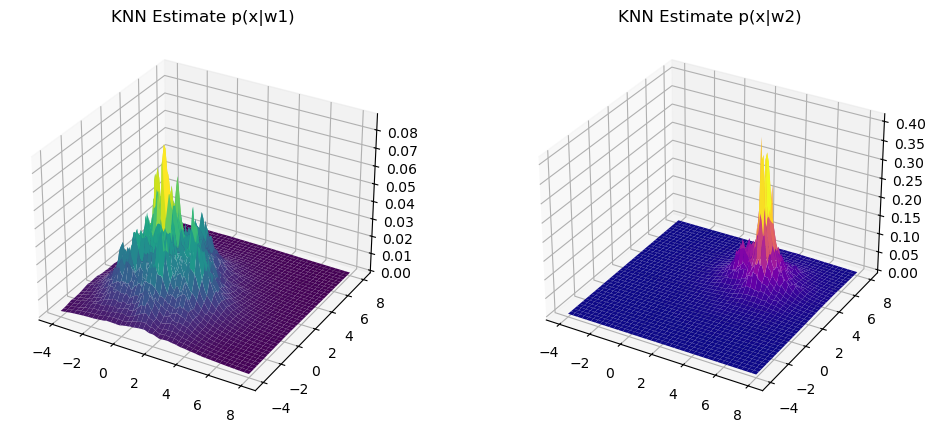

In [ ]:
fig = plt.figure(figsize=(12, 5))

# Class 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(Xg, Yg, P1, cmap='viridis')
ax1.set_title("KNN Estimate p(x|w1)")

# Class 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(Xg, Yg, P2, cmap='plasma')
ax2.set_title("KNN Estimate p(x|w2)")

plt.show()

In [7]:
# Classification of test point
x_test = np.array([[1], [-2]])
p1_val = knn_density_estimation(x_test, hw3_2_1, k)
p2_val = knn_density_estimation(x_test, hw3_2_2, k)

print(f"Point {x_test.T}:")
print(f"p(x|w1) = {p1_val}")
print(f"p(x|w2) = {p2_val}")
print(f"Classified as: {'w1' if p1_val > p2_val else 'w2'}")

Point [[ 1 -2]]:
p(x|w1) = 0.02763684158524515
p(x|w2) = 0.001021215373465318
Classified as: w1


# Problem 2 

## Part 1

In [9]:
# Parzen parameters
n_samples = hw3_2_1.shape[1]
h1 = 2.0
h = h1 / np.sqrt(n_samples)
norm_const = 1.0 / (2*np.pi * h*h)

xs = np.arange(-4, 8.1, 0.1)
ys = np.arange(-4, 8.1, 0.1)

P1 = np.zeros((len(xs), len(ys)))
P2 = np.zeros((len(xs), len(ys)))

In [10]:
# Compute Parzen for each point
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        X = np.array([[x],[y]])  # 2x1
        
        # Class 1
        diffs1 = X - hw3_2_1
        u1 = diffs1 / h
        k1 = np.exp(-0.5*(u1[0]**2 + u1[1]**2))
        P1[i,j] = norm_const * np.mean(k1)
        
        # Class 2
        diffs2 = X - hw3_2_2
        u2 = diffs2 / h
        k2 = np.exp(-0.5*(u2[0]**2 + u2[1]**2))
        P2[i,j] = norm_const * np.mean(k2)

x_test = np.array([[1],[-2]])

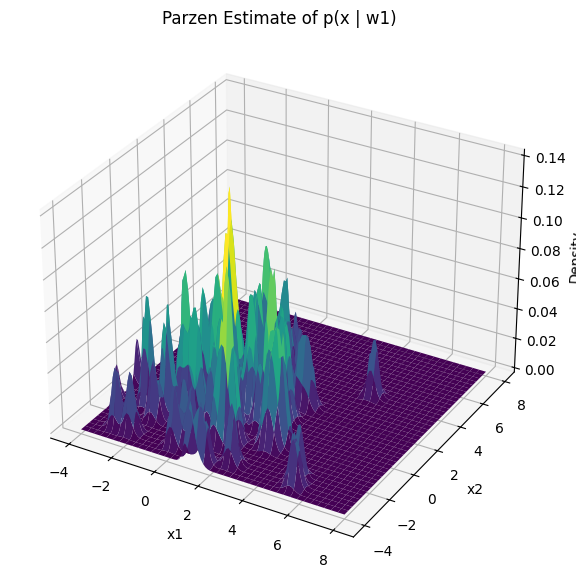

In [11]:
# Create meshgrid
Xg, Yg = np.meshgrid(xs, ys)
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, P1.T, cmap='viridis')

ax.set_title("Parzen Estimate of p(x | w1)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Density")
plt.show()

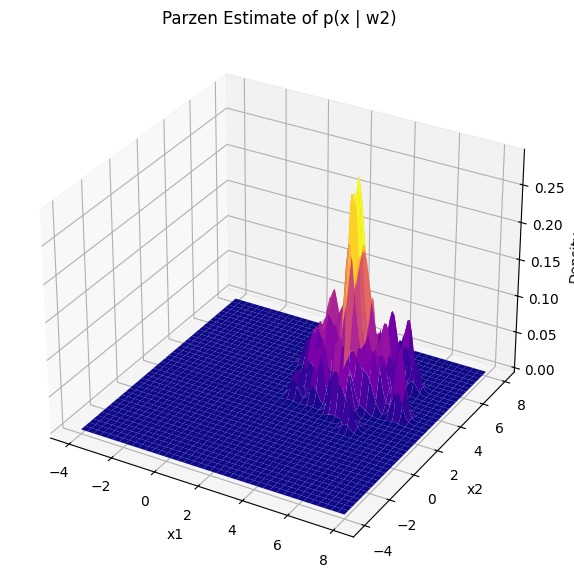

In [12]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Xg, Yg, P2.T, cmap='plasma')

ax.set_title("Parzen Estimate of p(x | w2)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Density")
plt.show()

In [13]:
def parzen_point(x, w):
    diffs = x - w
    u = diffs / h
    k = np.exp(-0.5*(u[0]**2 + u[1]**2))
    return norm_const * np.mean(k)

In [14]:
p1_test = parzen_point(x_test, hw3_2_1)
p2_test = parzen_point(x_test, hw3_2_2)

In [15]:
print(p1_test)
print(p2_test)

if p1_test > p2_test:
    print("Belongs to class w1")
else:
    print("Belongs to class w2")


0.012295818993957312
2.811903709825917e-119
Belongs to class w1


0.012295818993957312

2.811903709825917e-119

Belongs to class w1

## Part 2

In [16]:
x = np.array([[1],[-2]]) # Test Data
sigma2 = 0.2**2

In [17]:
# Net Activation
net1 = x.T @ hw3_2_1
net2 = x.T @ hw3_2_2

# Activation Functions
g1 = np.sum(np.exp((net1 - 1) / sigma2))
g2 = np.sum(np.exp((net2 - 1) / sigma2))

In [18]:
print(g1)
print(g2)

if g1 > g2:
    print("Class 1")
else:
    print("Class 2")


6.569719746719733e+118
499788099337494.3
Class 1


6.569719746719733e+118

499788099337494.3

Class 1